# Tutorial: applying space motion

The `astropy.SkyCoord` is able to handle the proper motion of sources.

This notebook illustrates how to propagate the position of the source to the given epochs.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import warpfield as w

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude, Angle, Distance
from astropy.coordinates import EarthLocation
from astropy.time import Time
import astropy.units as u

Here, we define an artificial object at the location of M2. The distance to the object is set 1.0 pc. The proper motion is set as follows. Note that `SkyCoord` requires the proper motion along with right ascension corrected by declination. The observation time is set 2016.0, which is the nominal epoch of the Gaia EDR3 catalog.

In [3]:
pointing = SkyCoord.from_name('M2')
ra = pointing.ra
dec = pointing.dec
dist = Distance(parallax=3.0*u.mas)
pmra = 150*u.mas/u.year
pmdec = -15*u.mas/u.year
epoch = Time(2016.0, format='decimalyear')
source = SkyCoord(ra,dec,pm_ra_cosdec=pmra,pm_dec=pmdec,distance=dist,obstime=epoch)

The time grid is defined for &pm;600 days. Use `apply_space_motion` to propagate the proper motion.

In [4]:
obstime = epoch + np.arange(-600,601,10)*u.day
propagated = [source.apply_space_motion(t) for t in obstime]

Illustrate the motion of the object.

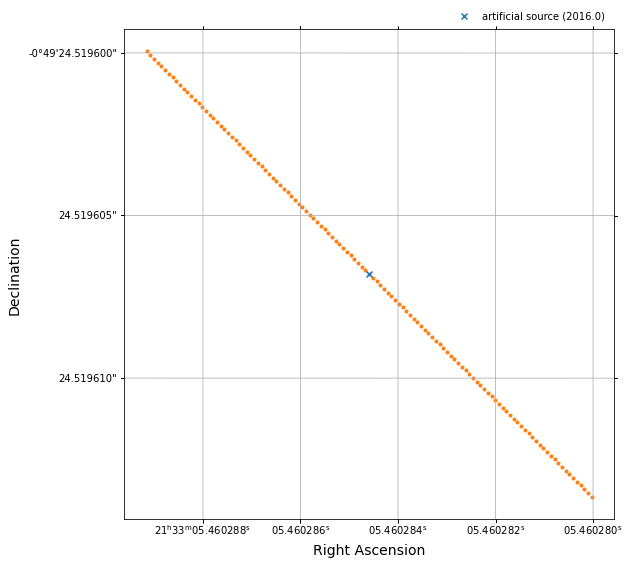

In [5]:
proj = w.get_projection(pointing)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=proj)
ax.set_position([0.13,0.10,0.85,0.85])
for s in propagated:
    ax.scatter(s.ra, s.dec, color='C1', marker='.')
ax.scatter(source.ra, source.dec, marker='x', label='artificial source (2016.0)')
ax.legend(bbox_to_anchor=[1,1], loc='lower right', frameon=False)
ax.grid()
ax.set_xlabel('Right Ascension', fontsize=14)
ax.set_ylabel('Declination', fontsize=14)
plt.show()